In [318]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing

# Exercise 1: Regression Implementation

## Question 2

Implement the Ridge regression algorithm using the closed form solution for linear regression. 
Test Ridge regression implementation on the Boston housing dataset (to predict the median house price, \ie, $y$). Use the train and test splits provided on Moodle. Try $\lambda \in \{0, 0.25, 0.5, 0.75, 1\}$ and report your training error, and test error for each. 


### Step 1: Load the Dataset


In [319]:
house_train_X = pd.read_csv('./housing_dataset/housing_X_train.csv', header=None).T
house_train_X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,0.03537,34.0,6.09,0.0,0.433,6.590,40.4,5.4917,7.0,329.0,16.1,395.75,9.50
302,0.09266,34.0,6.09,0.0,0.433,6.495,18.4,5.4917,7.0,329.0,16.1,383.61,8.67
303,0.10000,34.0,6.09,0.0,0.433,6.982,17.7,5.4917,7.0,329.0,16.1,390.43,4.86
304,0.05515,33.0,2.18,0.0,0.472,7.236,41.1,4.0220,7.0,222.0,18.4,393.68,6.93


In [320]:
house_train_y = pd.read_csv('./housing_dataset/housing_y_train.csv', header=None)
house_train_y

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
301,22.0
302,26.4
303,33.1
304,36.1


In [321]:
house_test_X = pd.read_csv('./housing_dataset/housing_X_test.csv', header=None).T
house_test_X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.07503,33.0,2.18,0.0,0.472,7.420,71.9,3.0992,7.0,222.0,18.4,396.90,6.47
1,0.04932,33.0,2.18,0.0,0.472,6.849,70.3,3.1827,7.0,222.0,18.4,396.90,7.53
2,0.49298,0.0,9.90,0.0,0.544,6.635,82.5,3.3175,4.0,304.0,18.4,396.90,4.54
3,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97
4,2.63550,0.0,9.90,0.0,0.544,4.973,37.8,2.5194,4.0,304.0,18.4,350.45,12.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
196,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
197,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
198,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [322]:
house_test_y = pd.read_csv('./housing_dataset/housing_y_test.csv', header=None)
house_test_y

,0
0,33.4
1,28.2
2,22.8
3,20.3
4,16.1
...,...
195,22.4
196,20.6
197,23.9
198,22.0


In [323]:
def normalize(X_train, X_test):
    mean = X_train.mean(axis=0)
    std = X_train.std(axis=0)
    X_train_norm = (X_train - mean) / std
    X_test_norm = (X_test - mean) / std
    return X_train_norm, X_test_norm

### Step 2: Ridge Regression Closed-Form Solution

The closed-form solution for Ridge Regression is:


$w_{\text{closed-form}} = (X^TX + \lambda I_d)^{-1} X^T y$


Where:
- X  is the design matrix of features.
- is the target vector.
- $\lambda$  is the regularization parameter.
- is the identity matrix of dimension  $d \times d$  (where  d  is the number of features).

Implementation of Ridge Regression using the Closed-Form Solution:

In [324]:
def ridge_regression_closed_form(X_train, y_train, lambd):
    n, d = X_train.shape
    I = np.eye(d) 
    w = np.linalg.inv(X_train.T @ X_train + lambd * I) @ X_train.T @ y_train
    return w

def compute_MeanSquaredError(X, y, w):
    predictions = X @ w
    error = np.mean((predictions - y) ** 2)
    return error

### Step 3: Train and Test the Model


In [325]:
class InfoHolder:
    def __init__(self, l, wei, tr_e, te_e):
        self.lambd = l
        self.w = wei
        self.train_error = tr_e
        self.test_error = te_e

In [326]:
house_train_y = house_train_y
house_test_y = house_test_y

# X_train_norm, X_test_norm = normalize(house_train_X, house_test_X)
X_train_norm = sklearn.preprocessing.normalize(house_train_X)
X_test_norm = sklearn.preprocessing.normalize(house_test_X)
# X_train_norm, X_test_norm = house_train_X, house_test_X
lambdas = [0, 0.25, 0.5, 0.75, 1]
ridge_CF_holder = []
for lambd in lambdas:
    w = ridge_regression_closed_form(X_train_norm, house_train_y, lambd)
    train_error = compute_MeanSquaredError(X_train_norm, house_train_y, w)
    test_error = compute_MeanSquaredError(X_test_norm, house_test_y, w)
    ridge_CF_holder.append(InfoHolder(lambd, w, train_error, test_error))
    
    print(f"Lambda: {lambd}")
    print(f"Training Error (MSE): {train_error}")
    print(f"Test Error (MSE): {test_error}")
    print()

Lambda: 0
Training Error (MSE): 10.931713657805608
Test Error (MSE): 240.08953928963987

Lambda: 0.25
Training Error (MSE): 57.14479934075605
Test Error (MSE): 60.83880996185464

Lambda: 0.5
Training Error (MSE): 60.45873676838283
Test Error (MSE): 61.6437113818854

Lambda: 0.75
Training Error (MSE): 61.99062623881368
Test Error (MSE): 61.5480807365128

Lambda: 1
Training Error (MSE): 62.97982206768707
Test Error (MSE): 61.22727981808377



## Question 3

solve Ridge regression using the gradient descent algorithm

Gradient of the Ridge Loss Function

The gradient of the Ridge objective function with respect to  w  is:


$\nabla L(w) = \frac{1}{n} X^T (Xw - y) + 2 \lambda w$

With update of:


$w \leftarrow w - \eta \nabla L(w)$




In [327]:
house_train_X = pd.read_csv('./housing_dataset/housing_X_train.csv', header=None).T
house_train_y = pd.read_csv('./housing_dataset/housing_y_train.csv', header=None)
house_test_X = pd.read_csv('./housing_dataset/housing_X_test.csv', header=None).T
house_test_y = pd.read_csv('./housing_dataset/housing_y_test.csv', header=None)

In [328]:
def ridge_regression_gradient_descent(X, y, lambd, learning_rate=0.01, epochs=1000):
    X = np.array(X)
    y = np.array(y).reshape(-1)
    n, d = X.shape
    w = np.zeros(d)  
    for epoch in range(epochs):
        gradient = (1 / n) * (X.T @ (X @ w - y)) + 2 * lambd * w
        np.clip(gradient, -10, 10, out=gradient) 
        w = w - learning_rate * gradient
    return w

def compute_MeanSquaredError_GD(X, y, w):
    X = np.array(X)
    y = np.array(y).reshape(-1)
    predictions = X @ w
    error = np.mean((predictions - y) ** 2)
    return error

In [329]:
house_train_y = house_train_y
house_test_y = house_test_y

# X_train_norm, X_test_norm = normalize(house_train_X, house_test_X)
X_train_norm = sklearn.preprocessing.normalize(house_train_X)
X_test_norm = sklearn.preprocessing.normalize(house_test_X)
# X_train_norm, X_test_norm = house_train_X, house_test_X
lambdas = [0, 0.25, 0.5, 0.75, 1]

ridge_GD_holder = []

for lambd in lambdas:
    w_gd = ridge_regression_gradient_descent(X_train_norm, house_train_y, lambd, learning_rate=0.01, epochs=1000)
    train_error = compute_MeanSquaredError_GD(X_train_norm, house_train_y, w_gd)
    test_error = compute_MeanSquaredError_GD(X_test_norm, house_test_y, w_gd)
    ridge_GD_holder.append(InfoHolder(lambd, w_gd, train_error, test_error))
    
    print(f"Lambda: {lambd}")
    print(f"Training Error (MSE): {train_error}")
    print(f"Test Error (MSE): {test_error}")
    print()

Lambda: 0
Training Error (MSE): 74.8077931010119
Test Error (MSE): 74.38365211949478

Lambda: 0.25
Training Error (MSE): 151.46524044642152
Test Error (MSE): 58.939651514248766

Lambda: 0.5
Training Error (MSE): 244.2179902952785
Test Error (MSE): 95.00553242759284

Lambda: 0.75
Training Error (MSE): 316.8091066596825
Test Error (MSE): 131.01516762318494

Lambda: 1
Training Error (MSE): 372.1542385841536
Test Error (MSE): 160.97574673857798



## Question 4 


Solve Lasso regression using gradient descent algorithm
Lasso regression minimizes the following objective function:


$L(w) = \frac{1}{2n} \sum_{i=1}^{n} (X_i w - y_i)^2 + \lambda \| w \|_1$

Gradient for Lasso Regression

The gradient of the Lasso objective function is:


$\nabla L(w) = \frac{1}{n} X^T (Xw - y) + \lambda \text{ sign}(w)$


Where  $sign(w)$  is the sign function applied element-wise:

- sign(w_i) = 1  if  w_i > 0 
- sign(w_i) = -1  if  w_i < 0 
- sign(w_i) = 0  if  w_i = 0 

In [330]:
house_train_X = pd.read_csv('./housing_dataset/housing_X_train.csv', header=None).T
house_train_y = pd.read_csv('./housing_dataset/housing_y_train.csv', header=None)
house_test_X = pd.read_csv('./housing_dataset/housing_X_test.csv', header=None).T
house_test_y = pd.read_csv('./housing_dataset/housing_y_test.csv', header=None)

In [331]:
def lasso_regression_gradient_descent(X, y, lambd, learning_rate=0.01, epochs=1000):
    X = np.array(X)
    y = np.array(y).reshape(-1)
    n, d = X.shape
    w = np.zeros(d)  
    for epoch in range(epochs):
        gradient = (1/n) * (X.T @ (X @ w - y)) + lambd * np.sign(w)
        np.clip(gradient, -10, 10, out=gradient)  
        w = w - learning_rate * gradient
    return w

def compute_MeanSquaredError_GD(X, y, w):
    X = np.array(X)
    y = np.array(y).reshape(-1)
    predictions = X @ w
    error = np.mean((predictions - y) ** 2)
    return error

In [332]:
house_train_y = house_train_y
house_test_y = house_test_y

# X_train_norm, X_test_norm = normalize(house_train_X, house_test_X)
X_train_norm = sklearn.preprocessing.normalize(house_train_X)
X_test_norm = sklearn.preprocessing.normalize(house_test_X)
# X_train_norm, X_test_norm = house_train_X, house_test_X
lambdas = [0, 0.25, 0.5, 0.75, 1]

lasso_GD_holder = []

for lambd in lambdas:
    w_lasso = lasso_regression_gradient_descent(X_train_norm, house_train_y, lambd, learning_rate=0.01, epochs=1000)
    train_error = compute_MeanSquaredError_GD(X_train_norm, house_train_y, w_lasso)
    test_error = compute_MeanSquaredError_GD(X_test_norm, house_test_y, w_lasso)
    lasso_GD_holder.append(InfoHolder(lambd, w_lasso, train_error, test_error))
    
    print(f"Lambda: {lambd}")
    print(f"Training Error (MSE): {train_error}")
    print(f"Test Error (MSE): {test_error}")
    print()

Lambda: 0
Training Error (MSE): 74.8077931010119
Test Error (MSE): 74.38365211949478

Lambda: 0.25
Training Error (MSE): 74.96484309673673
Test Error (MSE): 70.55654656048087

Lambda: 0.5
Training Error (MSE): 75.03453199881287
Test Error (MSE): 67.1639208484864

Lambda: 0.75
Training Error (MSE): 75.46520237176637
Test Error (MSE): 63.82140402041553

Lambda: 1
Training Error (MSE): 76.15974158230705
Test Error (MSE): 60.85047024810788



## Question 5

Do you think gradient descent is better than the closed form solution of Ridge regression?

In this part, I will compare the performance of Ridge Regression using both Gradient Descent (GD) and the Closed-Form (CF) solution, along with Lasso Regression using Gradient Descent.

Key Differences:

- Ridge (Closed-Form): The closed-form solution gives the exact optimal solution for Ridge regression in one step. It is computationally efficient for smaller datasets, but it becomes impractical for larger datasets due to matrix inversion.
- Ridge (GD): The gradient descent method iteratively minimizes the cost function, updating the weights over multiple iterations. This method is slower than the closed-form solution for small datasets but is more scalable and flexible, especially for larger datasets. It also allows us to control the learning rate and number of epochs, making it suitable for online learning or streaming data.
- Lasso (GD): Since Lasso does not have a closed-form solution, I implemented it using gradient descent. Lasso introduces sparsity by penalizing the L1 norm, which sets some of the coefficients to exactly zero, making it a good choice for feature selection.

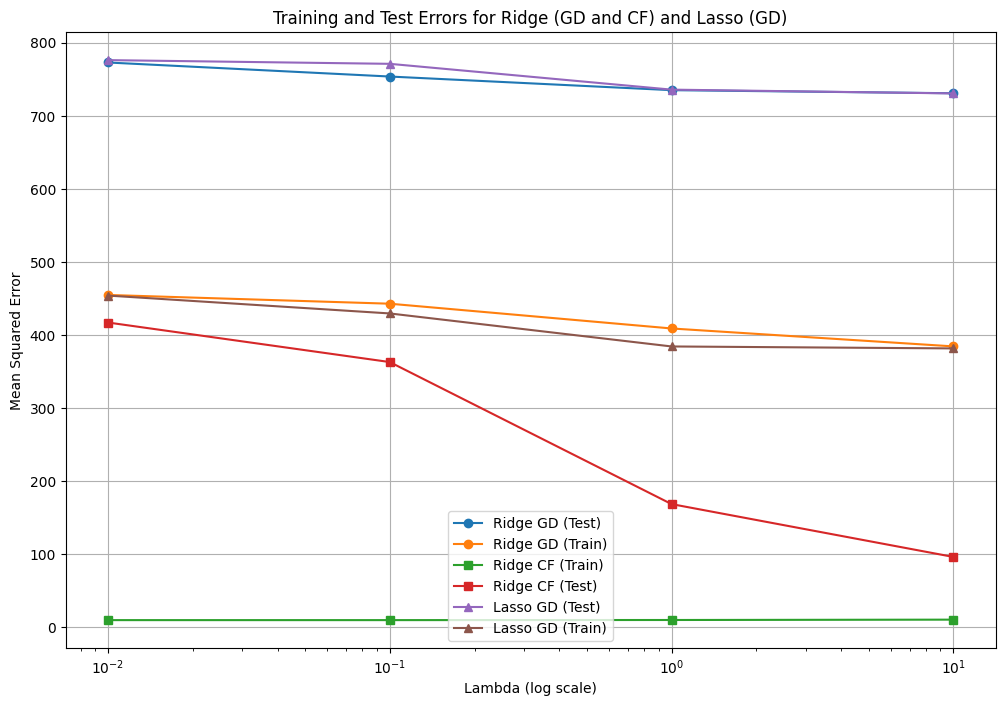

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [333]:
# # Generate synthetic data for testing
# np.random.seed(42)
# n_samples, n_features = 100, 5
# house_train_X = np.random.rand(n_samples, n_features)
# house_test_X = np.random.rand(n_samples, n_features)
# house_train_y = np.random.rand(n_samples)
# house_test_y = np.random.rand(n_samples)

lambdas = [0.01, 0.1, 1, 10]
learning_rate = 0.01
epochs = 1000

ridge_gd_errors_train = []
ridge_gd_errors_test = []
ridge_cf_errors_train = []
ridge_cf_errors_test = []
lasso_errors_train = []
lasso_errors_test = []

for lambd in lambdas:
    # Ridge (Gradient Descent)
    w_ridge_gd = ridge_regression_gradient_descent(house_train_X, house_train_y, lambd, learning_rate, epochs)
    ridge_gd_errors_train.append(compute_MeanSquaredError_GD(house_train_X, house_train_y, w_ridge_gd))
    ridge_gd_errors_test.append(compute_MeanSquaredError_GD(house_test_X, house_test_y, w_ridge_gd))

    # Ridge (Closed-Form)
    w_ridge_cf = ridge_regression_closed_form(house_train_X, house_train_y, lambd)
    ridge_cf_errors_train.append(compute_MeanSquaredError(house_train_X, house_train_y, w_ridge_cf))
    ridge_cf_errors_test.append(compute_MeanSquaredError(house_test_X, house_test_y, w_ridge_cf))

    # Lasso (Gradient Descent)
    w_lasso = lasso_regression_gradient_descent(house_train_X, house_train_y, lambd, learning_rate, epochs)
    lasso_errors_train.append(compute_MeanSquaredError_GD(house_train_X, house_train_y, w_lasso))
    lasso_errors_test.append(compute_MeanSquaredError_GD(house_test_X, house_test_y, w_lasso))

plt.figure(figsize=(12, 8))

plt.plot(lambdas, ridge_gd_errors_train, label='Ridge GD (Test)', marker='o')
plt.plot(lambdas, ridge_gd_errors_test, label='Ridge GD (Train)', marker='o')

plt.plot(lambdas, ridge_cf_errors_train, label='Ridge CF (Train)', marker='s')
plt.plot(lambdas, ridge_cf_errors_test, label='Ridge CF (Test)', marker='s')

plt.plot(lambdas, lasso_errors_train, label='Lasso GD (Test)', marker='^')
plt.plot(lambdas, lasso_errors_test, label='Lasso GD (Train)', marker='^')

plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test Errors for Ridge (GD and CF) and Lasso (GD)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))

## Question 6

Can you explain how the Lasso and Ridge regression algorithms affected the $\theta$ values?


- Ridge regression results in smaller $\theta$ values compared to standard linear regression but none of the values will be exactly zero.
- Lasso regression can shrink some $\theta$ values to zero, meaning it’s capable of performing feature selection.
- This difference is because Ridge applies $\ell_2$ regularization, which generally reduces the magnitude of $\theta$ values, whereas Lasso uses $\ell_1$ regularization, which can completely eliminate some features by setting their corresponding \theta values to zero.

# Exercise 2: Decision Trees Implementation

## Question 1

### Step 1. Loss Functions

Misclassification Error:

\$text{misclassification\_loss}(y) = \min(\hat{p}, 1 - \hat{p})$

Gini Coefficient:

$\text{gini}(y) = \hat{p}(1 - \hat{p})$

Entropy:

$\text{entropy}(y) = -\hat{p} \log_2(\hat{p}) - (1 - \hat{p}) \log_2(1 - \hat{p})$


In [334]:
def misclassification_loss(y):
    p = np.mean(y)
    return min(p, 1 - p)

def gini(y):
    p = np.mean(y)
    return p * (1 - p)

def entropy(y):
    p = np.mean(y)
    if p == 0 or p == 1:
        return 0
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

### step 2. Splitting

Given a feature  i  and a threshold  j , we split the dataset into left and right parts based on the condition  $x[i] \leq j$ .

In [335]:
def split(X, y, feature_index, threshold):
    left_mask = X[:, feature_index] <= threshold
    right_mask = X[:, feature_index] > threshold
    return X[left_mask], X[right_mask], y[left_mask], y[right_mask]

### Step 3: Calculate the Split Loss


For each possible feature and threshold, we calculate the weighted loss:

In [336]:
def weighted_loss(X, y, feature_index, threshold, loss_func):
    X_L, X_R, y_L, y_R = split(X, y, feature_index, threshold)
    if len(y_L) == 0 or len(y_R) == 0:
        return float('inf')  

    p_L = len(y_L) / len(y)
    p_R = len(y_R) / len(y)
    
    return p_L * loss_func(y_L) + p_R * loss_func(y_R)

### Step 4: Finding the Best Split


For each feature and each threshold, we are computing the loss and finding the one that minimizes the loss.

In [337]:
def best_split(X, y, loss_func):
    best_feature, best_threshold, min_loss = None, None, float('inf')

    for feature_index in range(X.shape[1]):
        thresholds = np.unique(X[:, feature_index])
        for threshold in thresholds:
            loss = weighted_loss(X, y, feature_index, threshold, loss_func)
            if loss < min_loss:
                min_loss = loss
                best_feature = feature_index
                best_threshold = threshold

    return best_feature, best_threshold

### Step 5: Recursive Tree Building


we will recursively build the decision tree by finding the best split at each node. Stop splitting if the node is pure or if the maximum depth is reached.

In [338]:
class DecisionTree:
    def __init__(self, max_depth, loss_func):
        self.max_depth = max_depth
        self.loss_func = loss_func
        self.tree = None

    def build_tree(self, X, y, depth):
        if len(np.unique(y)) == 1 or depth >= self.max_depth:
            return np.mean(y)  

        best_feature, best_threshold = best_split(X, y, self.loss_func)

        if best_feature is None:
            return np.mean(y)  

        X_L, X_R, y_L, y_R = split(X, y, best_feature, best_threshold)
        left_subtree = self.build_tree(X_L, y_L, depth + 1)
        right_subtree = self.build_tree(X_R, y_R, depth + 1)

        return {"feature": best_feature, "threshold": best_threshold, 
                "left": left_subtree, "right": right_subtree}

    def fit(self, X, y):
        self.tree = self.build_tree(X, y, 0)

    def predict_one(self, x, node):
        if isinstance(node, dict):
            if x[node["feature"]] <= node["threshold"]:
                return self.predict_one(x, node["left"])
            else:
                return self.predict_one(x, node["right"])
        else:
            return node  

    def predict(self, X):
        return np.array([self.predict_one(x, self.tree) for x in X])

### Step 6: Training and Testing the Model


In [339]:
from sklearn.metrics import accuracy_score

def train_and_evaluate(X_train, y_train, X_test, y_test, max_depths, loss_func):
    train_accuracies = []
    test_accuracies = []
    
    for max_depth in max_depths:
        tree = DecisionTree(max_depth=max_depth, loss_func=loss_func)
        tree.fit(X_train, y_train)
        
        y_train_pred = (tree.predict(X_train) >= 0.5).astype(int)
        y_test_pred = (tree.predict(X_test) >= 0.5).astype(int)
        
        train_accuracies.append(accuracy_score(y_train, y_train_pred))
        test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    return train_accuracies, test_accuracies

In [340]:
# Load the dataset
X_train = np.loadtxt('./decision_tree data/data/X_train.csv', delimiter=",")
y_train = np.loadtxt('./decision_tree data/data/y_train.csv', delimiter=",").astype(int)
X_test = np.loadtxt('./decision_tree data/data/X_test.csv', delimiter=",")
y_test = np.loadtxt('./decision_tree data/data/y_test.csv', delimiter=",").astype(int)

## Question 1 answer: 

Create a different plot for each of the three loss functions (misclassification error, Gini index, and entropy)

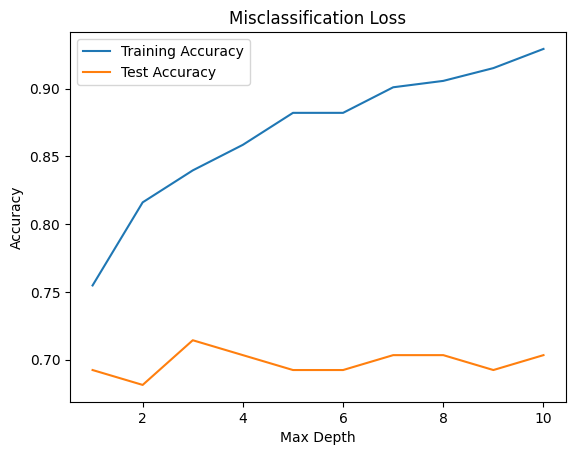

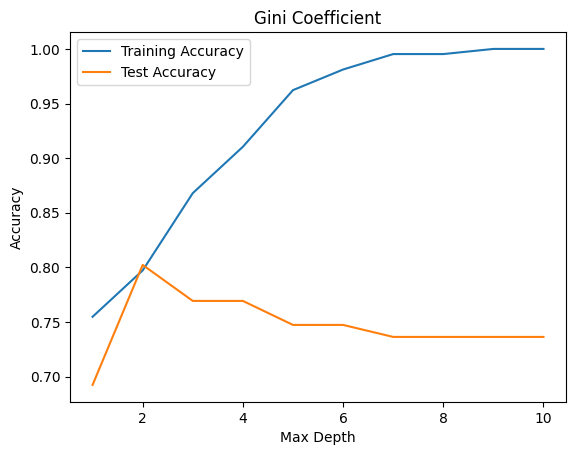

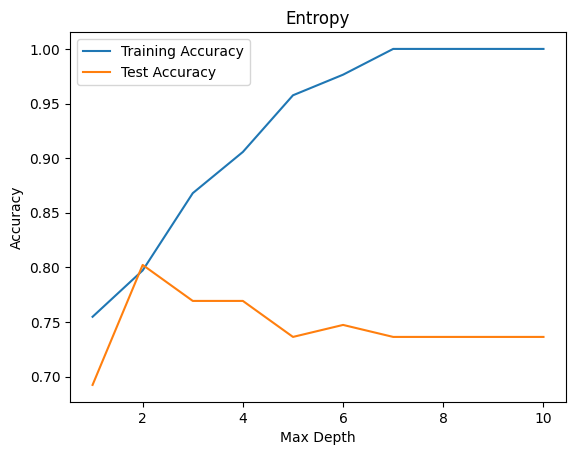

In [341]:
import matplotlib.pyplot as plt

def plot_results(max_depths, train_acc, test_acc, title):
    plt.plot(max_depths, train_acc, label='Training Accuracy')
    plt.plot(max_depths, test_acc, label='Test Accuracy')
    plt.xlabel('Max Depth')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.show()

max_depths = range(1, 11)

# Misclassification
train_acc, test_acc = train_and_evaluate(X_train, y_train, X_test, y_test, max_depths, misclassification_loss)
plot_results(max_depths, train_acc, test_acc, 'Misclassification Loss')

# Gini
train_acc, test_acc = train_and_evaluate(X_train, y_train, X_test, y_test, max_depths, gini)
plot_results(max_depths, train_acc, test_acc, 'Gini Coefficient')

# Entropy
train_acc, test_acc = train_and_evaluate(X_train, y_train, X_test, y_test, max_depths, entropy)
plot_results(max_depths, train_acc, test_acc, 'Entropy')

## Question 2

Observe and comment on how the different loss functions perform?

For Misclassification Error, I noticed that the training accuracy increases quickly as the depth grows, but the test accuracy eventually plateaus or drops due to overfitting. Since this loss function directly minimizes classification mistakes, it overfits faster compared to others.

With the Gini Coefficient, both training and test accuracies improve more steadily as the tree gets deeper. Gini strikes a better balance between fitting the data and generalizing well, as it accounts for class uncertainty rather than just counting errors.

Entropy behaves similarly to Gini, as both focus on reducing class impurity. In some cases, Entropy might offer slightly better generalization, but it comes at a higher computational cost. Like Gini, it handles uncertainty better and tends to overfit less than Misclassification.

As the tree depth increases, training accuracy improves across the board, but I found that Misclassification Error overfits the quickest, while Gini and Entropy perform better at generalizing, with Gini often being the more efficient and reliable option.